In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ds=np.array([[3,-4,3,2],[1,7,1,1],[4,3,1,0],[-7,1,-3,-1],[3,-4,-1,-2],[7,-1,3,1]])
ds

array([[ 3, -4,  3,  2],
       [ 1,  7,  1,  1],
       [ 4,  3,  1,  0],
       [-7,  1, -3, -1],
       [ 3, -4, -1, -2],
       [ 7, -1,  3,  1]])

In [ ]:
df = pd.DataFrame(ds, columns=['p1','p2','p3','p4'])
df

,p1,p2,p3,p4
0,3,-4,3,2
1,1,7,1,1
2,4,3,1,0
3,-7,1,-3,-1
4,3,-4,-1,-2
5,7,-1,3,1


1. "Поверните" первые два столбца на угол  arccos(3/5) .

In [ ]:
df2 = ds[:, :2]  #берем первые 2 столбца
df2


array([[ 3, -4],
       [ 1,  7],
       [ 4,  3],
       [-7,  1],
       [ 3, -4],
       [ 7, -1]])

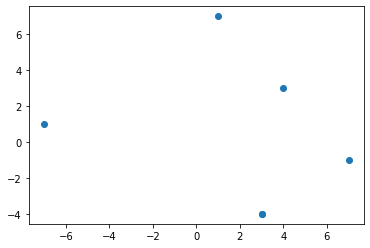

In [ ]:
plt.scatter(df2[:,0], df2[:,1]) 

In [ ]:
r=np.array([[3/5, -4/5],[4/5, 3/5]])  # arccos 3/5 - это угол, косинус которого = 3/5, то есть cos a = 3/5.
r

array([[ 0.6, -0.8],
       [ 0.8,  0.6]])

In [ ]:
NewList=[] #Список новых координат

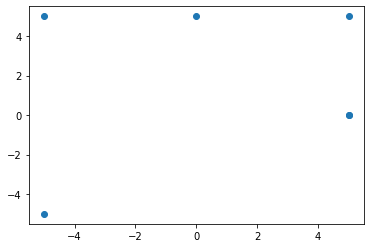

In [ ]:
for i in range(df2.shape[0]):   #Преобразуем координаты каждой точки, задаваемой ds
    new=r.dot(df2[i])
    NewList.append(new)
New=np.array(NewList)
plt.scatter(New[:,0], New[:,1]) 

2. Преобразуйте получившуюся матрицу: веса новых признаков 3,2,4,1 соответственно

In [ ]:
NewList # новые  столбцы

[array([5.00000000e+00, 2.22044605e-16]),
 array([-5.,  5.]),
 array([-4.4408921e-16,  5.0000000e+00]),
 array([-5., -5.]),
 array([5.00000000e+00, 2.22044605e-16]),
 array([5., 5.])]

In [ ]:
old = ds[:, 2:]  #берем другие 2 столбца исходной матрицы
old

array([[ 3,  2],
       [ 1,  1],
       [ 1,  0],
       [-3, -1],
       [-1, -2],
       [ 3,  1]])

In [ ]:
addNew = np.append(NewList, old, axis=1)  #добавляем к новым столбцам прежние
addNew

array([[ 5.00000000e+00,  2.22044605e-16,  3.00000000e+00,
         2.00000000e+00],
       [-5.00000000e+00,  5.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-4.44089210e-16,  5.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-5.00000000e+00, -5.00000000e+00, -3.00000000e+00,
        -1.00000000e+00],
       [ 5.00000000e+00,  2.22044605e-16, -1.00000000e+00,
        -2.00000000e+00],
       [ 5.00000000e+00,  5.00000000e+00,  3.00000000e+00,
         1.00000000e+00]])

In [ ]:
B = np.array([[3,2,4,1]])   #веса  

C = addNew * B    #применим веса
C

array([[ 1.50000000e+01,  4.44089210e-16,  1.20000000e+01,
         2.00000000e+00],
       [-1.50000000e+01,  1.00000000e+01,  4.00000000e+00,
         1.00000000e+00],
       [-1.33226763e-15,  1.00000000e+01,  4.00000000e+00,
         0.00000000e+00],
       [-1.50000000e+01, -1.00000000e+01, -1.20000000e+01,
        -1.00000000e+00],
       [ 1.50000000e+01,  4.44089210e-16, -4.00000000e+00,
        -2.00000000e+00],
       [ 1.50000000e+01,  1.00000000e+01,  1.20000000e+01,
         1.00000000e+00]])

3. Какие признаки образуют линейно независимую подсистему? (проверить используя ранг)

In [ ]:
ranC = np.linalg.matrix_rank(C)

print("Матрица:\n", C) 
print("Ранг матрицы:", ranC)

Матрица:
 [[ 1.50000000e+01  4.44089210e-16  1.20000000e+01  2.00000000e+00]
 [-1.50000000e+01  1.00000000e+01  4.00000000e+00  1.00000000e+00]
 [-1.33226763e-15  1.00000000e+01  4.00000000e+00  0.00000000e+00]
 [-1.50000000e+01 -1.00000000e+01 -1.20000000e+01 -1.00000000e+00]
 [ 1.50000000e+01  4.44089210e-16 -4.00000000e+00 -2.00000000e+00]
 [ 1.50000000e+01  1.00000000e+01  1.20000000e+01  1.00000000e+00]]
Ранг матрицы: 3


In [ ]:

print(np.linalg.matrix_rank(C) == C.shape[0])

False


 "векторы линейно независимы тогда и только тогда, когда ранг полученной матрицы совпадает с числом векторов." Здесь ранг не совпадает, поэтому все векторы здесь не являются линейно независимыми 

In [ ]:
С1 = C[:, 1:]  #берем без первого столбца
С1

array([[ 4.4408921e-16,  1.2000000e+01,  2.0000000e+00],
       [ 1.0000000e+01,  4.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+01,  4.0000000e+00,  0.0000000e+00],
       [-1.0000000e+01, -1.2000000e+01, -1.0000000e+00],
       [ 4.4408921e-16, -4.0000000e+00, -2.0000000e+00],
       [ 1.0000000e+01,  1.2000000e+01,  1.0000000e+00]])

In [ ]:
ranС1 = np.linalg.matrix_rank(С1)
print("Ранг матрицы:", ranС1)
print(np.linalg.matrix_rank(С1) == С1.shape[0])

Ранг матрицы: 3
False


Система по-прежнему не является линейно независимой. Попробуем взять ниже еще без одного признака - без второго столбца.

In [ ]:
С11 = C[:, :3]  #берем без последнего столбца
С11

array([[ 1.50000000e+01,  4.44089210e-16,  1.20000000e+01],
       [-1.50000000e+01,  1.00000000e+01,  4.00000000e+00],
       [-1.33226763e-15,  1.00000000e+01,  4.00000000e+00],
       [-1.50000000e+01, -1.00000000e+01, -1.20000000e+01],
       [ 1.50000000e+01,  4.44089210e-16, -4.00000000e+00],
       [ 1.50000000e+01,  1.00000000e+01,  1.20000000e+01]])

In [ ]:
ranС11 = np.linalg.matrix_rank(С11)
print("Ранг матрицы:", ranС11)
print(np.linalg.matrix_rank(С11) == С11.shape[0])

Ранг матрицы: 3
False


Система по-прежнему не является линейно независимой. Попробуем взять ниже еще без одного признака - без другого столбца.

In [ ]:

С12 = C[:, 0::2]  #берем без второго столбца
С12

array([[ 1.50000000e+01,  1.20000000e+01],
       [-1.50000000e+01,  4.00000000e+00],
       [-1.33226763e-15,  4.00000000e+00],
       [-1.50000000e+01, -1.20000000e+01],
       [ 1.50000000e+01, -4.00000000e+00],
       [ 1.50000000e+01,  1.20000000e+01]])

In [ ]:
С13 = C[:, 3:]  #берем последний столбец
С13

array([[ 2.],
       [ 1.],
       [ 0.],
       [-1.],
       [-2.],
       [ 1.]])

In [ ]:
С14 = np.append(С12, С13, axis=1)  #добавляем к столбцам последний. таким образом получаем без 2-го столбца
С14

array([[ 1.50000000e+01,  1.20000000e+01,  2.00000000e+00],
       [-1.50000000e+01,  4.00000000e+00,  1.00000000e+00],
       [-1.33226763e-15,  4.00000000e+00,  0.00000000e+00],
       [-1.50000000e+01, -1.20000000e+01, -1.00000000e+00],
       [ 1.50000000e+01, -4.00000000e+00, -2.00000000e+00],
       [ 1.50000000e+01,  1.20000000e+01,  1.00000000e+00]])

In [ ]:
ranС14 = np.linalg.matrix_rank(С14)
print("Ранг матрицы:", ranС14)
print(np.linalg.matrix_rank(С14) == С14.shape[0])

Ранг матрицы: 3
False


In [ ]:
С15 = C[:, :-2:1]  #берем 2 первые столбца
С15

array([[ 1.50000000e+01,  4.44089210e-16],
       [-1.50000000e+01,  1.00000000e+01],
       [-1.33226763e-15,  1.00000000e+01],
       [-1.50000000e+01, -1.00000000e+01],
       [ 1.50000000e+01,  4.44089210e-16],
       [ 1.50000000e+01,  1.00000000e+01]])

In [ ]:
С16 = np.append(С15, С13, axis=1)  #добавляем к столбцам последний. таким образом получаем без 3-го столбца
С16

array([[ 1.50000000e+01,  4.44089210e-16,  2.00000000e+00,
         2.00000000e+00,  2.00000000e+00],
       [-1.50000000e+01,  1.00000000e+01,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [-1.33226763e-15,  1.00000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.50000000e+01, -1.00000000e+01, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00],
       [ 1.50000000e+01,  4.44089210e-16, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00],
       [ 1.50000000e+01,  1.00000000e+01,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [ ]:
ranС16 = np.linalg.matrix_rank(С16)
print("Ранг матрицы:", ranС16)
print(np.linalg.matrix_rank(С16) == С16.shape[0])

Ранг матрицы: 3
False


In [ ]:
С2 = С1[:, 1:]  #берем без первого столбца
С2

array([], shape=(6, 0), dtype=float64)

In [ ]:
С2 = C[:, 2:]  #берем без первого столбца   КОПИЯ
С2

array([[ 12.,   2.],
       [  4.,   1.],
       [  4.,   0.],
       [-12.,  -1.],
       [ -4.,  -2.],
       [ 12.,   1.]])

In [ ]:
ranС2 = np.linalg.matrix_rank(С2)
print("Ранг матрицы:", ranС2)
print(np.linalg.matrix_rank(С2) == С2.shape[0])

Ранг матрицы: 2
False


Система по-прежнему не является линейно независимой. Попробуем взять ниже еще без одного признака - без следующего столбца.

In [ ]:
С3 = С2[:, 1:]  #берем без первого столбца
С3

array([[ 2.],
       [ 1.],
       [ 0.],
       [-1.],
       [-2.],
       [ 1.]])

In [ ]:
ranС3 = np.linalg.matrix_rank(С3)
print("Ранг матрицы:", ranС3)
print(np.linalg.matrix_rank(С3) == С3.shape[0])

Ранг матрицы: 1
False


Система по-прежнему не является линейно независимой.

Ниже проверка по строкам. 

In [ ]:
a = np.array([ 1.50000000e+01,  4.44089210e-16,  1.20000000e+01,
         2.00000000e+00])
b = np.array([-1.50000000e+01,  1.00000000e+01,  4.00000000e+00,
         1.00000000e+00])
c = np.array([-1.33226763e-15,  1.00000000e+01,  4.00000000e+00,
         0.00000000e+00])

m = np.array([a, b, c])
m

array([[ 1.50000000e+01,  4.44089210e-16,  1.20000000e+01,
         2.00000000e+00],
       [-1.50000000e+01,  1.00000000e+01,  4.00000000e+00,
         1.00000000e+00],
       [-1.33226763e-15,  1.00000000e+01,  4.00000000e+00,
         0.00000000e+00]])

In [ ]:
print(np.linalg.matrix_rank(m) == m.shape[0])

True


первые 3 вектора являются линейно независимыми

In [ ]:
d = np.array([-1.50000000e+01, -1.00000000e+01, -1.20000000e+01,
        -1.00000000e+00])
e = np.array([ 1.50000000e+01,  4.44089210e-16, -4.00000000e+00,
        -2.00000000e+00])
f = np.array([ 1.50000000e+01,  1.00000000e+01,  1.20000000e+01,
         1.00000000e+00])
mm = np.array([a, b, c])
mm

array([[ 1.50000000e+01,  4.44089210e-16,  1.20000000e+01,
         2.00000000e+00],
       [-1.50000000e+01,  1.00000000e+01,  4.00000000e+00,
         1.00000000e+00],
       [-1.33226763e-15,  1.00000000e+01,  4.00000000e+00,
         0.00000000e+00]])

In [ ]:
print(np.linalg.matrix_rank(mm) == mm.shape[0])

True


последние 3 вектора тоже являются линейно независимыми